🚀 خوش آمدید به دنیای علم داده!
✅ کتابخانه‌ها با موفقیت وارد شدند!
📊 نسخه Pandas: 2.2.2
🔢 نسخه NumPy: 2.0.2
📈 نمودارسازی آماده است!

📊 مرحله 1: ایجاد داده نمونه
🔄 در حال تولید داده‌های سفر...
✅ 1883 سفر با موفقیت ایجاد شد!
📊 ستون‌های داده: ['trip_id', 'driver_id', 'passenger_id', 'start_hour', 'duration_minutes', 'distance_km', 'day_of_week', 'origin', 'destination', 'driver_rating', 'traffic_condition', 'fare']

🔍 مرحله 2: بررسی اولیه داده‌ها
📋 نمونه داده‌ها:
   trip_id driver_id passenger_id  start_hour  duration_minutes  distance_km  \
0  T000001      D052        P0076          14         21.056056     8.002289   
1  T000002      D093        P0377          15          5.000000     7.823019   
2  T000003      D015        P0046          12          7.804731    13.487287   
3  T000004      D072        P0160          15         25.143139    13.312747   
4  T000005      D061        P0463          18         37.334585     6.084883   
5  T000006      D021        P0080          15         17

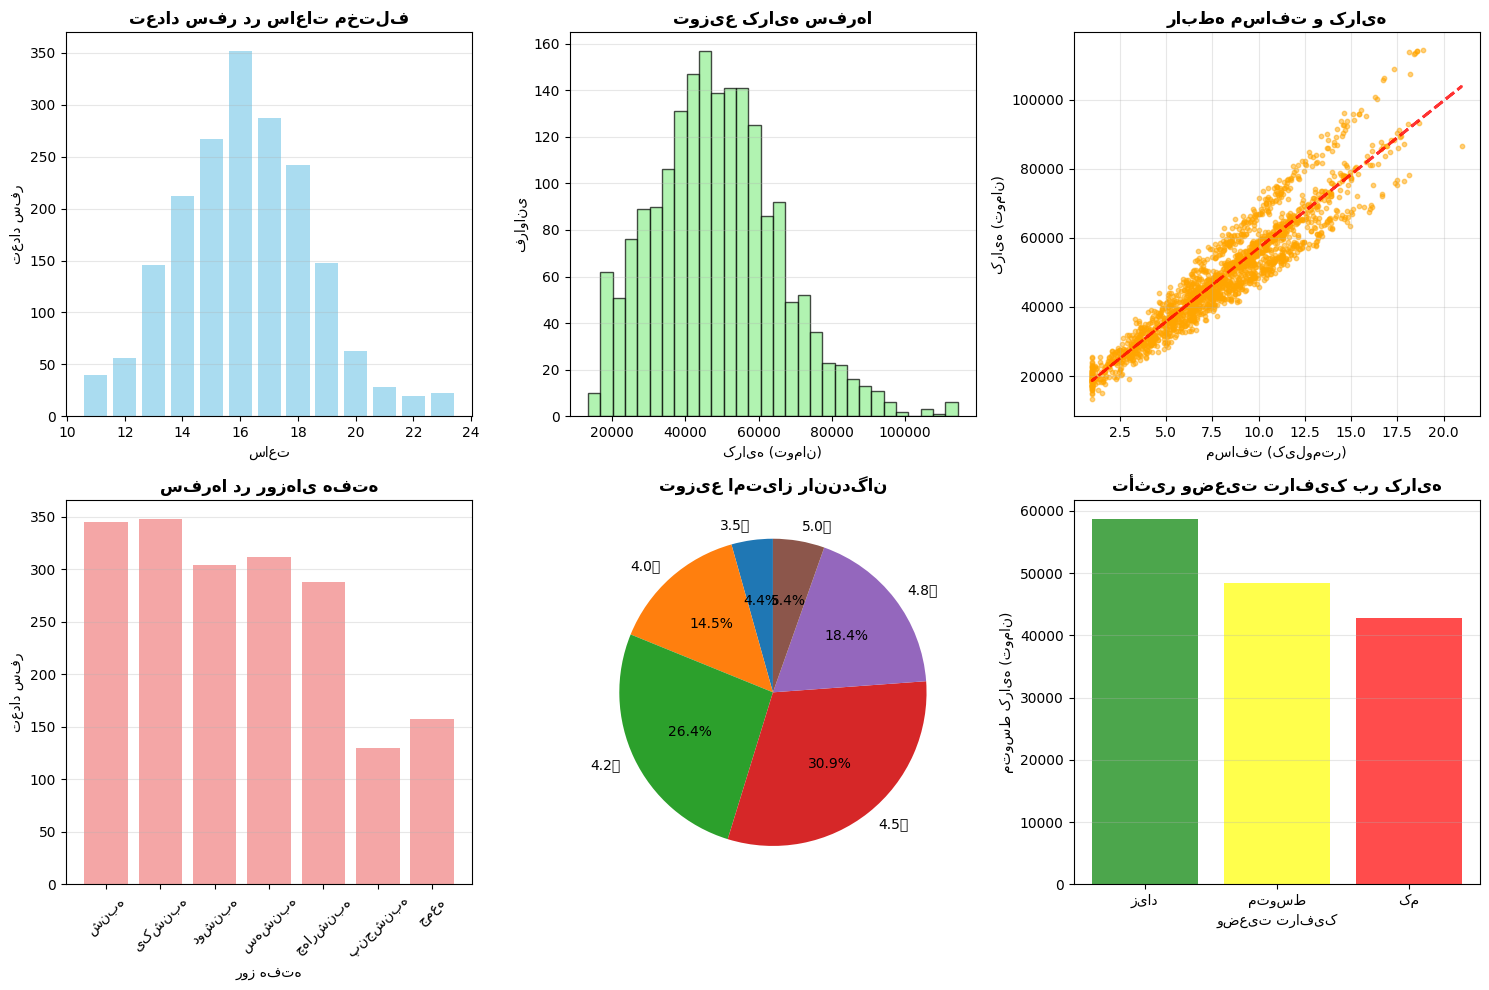


📈 مرحله 5: تحلیل آماری و همبستگی
🔗 ماتریس همبستگی:
                  duration_minutes  distance_km   fare  driver_rating
duration_minutes             1.000        0.030  0.033         -0.001
distance_km                  0.030        1.000  0.942         -0.005
fare                         0.033        0.942  1.000         -0.005
driver_rating               -0.001       -0.005 -0.005          1.000


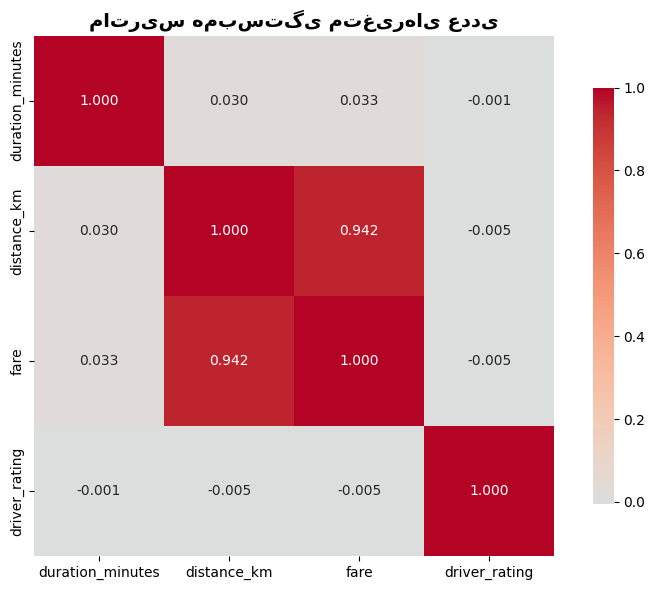


🎯 مرحله 6: یافته‌ها و نتیجه‌گیری
📋 خلاصه یافته‌های کلیدی:
----------------------------------------
🕐 ساعت شلوغ‌ترین: 16:00 با 352 سفر
💰 متوسط کرایه: 48,589 تومان
🛣️ متوسط مسافت: 8.0 کیلومتر
⏱️ متوسط مدت سفر: 25.3 دقیقه
🔗 همبستگی مسافت و کرایه: 0.942
🚦 تفاوت کرایه در ترافیک سنگین: +16,041 تومان

🎉 پایان جلسه اول - موفق باشید!
📅 جلسه بعد: پایتون برای علم داده


In [2]:
"""
🎓 دوره جامع علم داده با پایتون - جلسه اول
نمونه عملی: تحلیل ساده داده‌های سفر (نسخه تصحیح شده)
مدرس: آراز شاه کرمی
"""

# =============================================================================
# بخش 1: آماده‌سازی و بررسی محیط کاری
# =============================================================================

print("🚀 خوش آمدید به دنیای علم داده!")
print("="*50)

# وارد کردن کتابخانه‌های اصلی
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# تنظیمات نمایش فارسی
plt.rcParams['font.family'] = ['Tahoma', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

print("✅ کتابخانه‌ها با موفقیت وارد شدند!")
print(f"📊 نسخه Pandas: {pd.__version__}")
print(f"🔢 نسخه NumPy: {np.__version__}")
print(f"📈 نمودارسازی آماده است!")

# =============================================================================
# بخش 2: ایجاد داده نمونه (شبیه‌سازی داده‌های Snapp) - تصحیح شده
# =============================================================================

print("\n" + "="*50)
print("📊 مرحله 1: ایجاد داده نمونه")
print("="*50)

# تنظیم seed برای تکرارپذیری نتایج
np.random.seed(42)

# تعداد سفرهای نمونه
n_trips = 2000

# تعریف نام‌های مناطق تهران
tehran_districts = [
    'ولنجک', 'نیاوران', 'تجریش', 'سعادت‌آباد', 'شهرک غرب',
    'ونک', 'جردن', 'الهیه', 'فرمانیه', 'قیطریه',
    'میدان تجریش', 'میدان ولی‌عصر', 'میدان انقلاب', 'بازار',
    'میدان آزادی', 'شهر ری', 'کن', 'لویزان'
]

# ایجاد داده‌های سفر
print("🔄 در حال تولید داده‌های سفر...")

# تصحیح احتمالات ساعتی - مطمئن می‌شویم مجموع دقیقاً 1 باشد
hour_probs = [0.02, 0.03, 0.08, 0.12, 0.15, 0.18, 0.15, 0.12, 0.08, 0.03, 0.02, 0.01, 0.01]
# نرمال‌سازی احتمالات تا مجموع دقیقاً 1 شود
hour_probs = np.array(hour_probs)
hour_probs = hour_probs / hour_probs.sum()

# تصحیح احتمالات روزهای هفته
day_probs = [0.18, 0.18, 0.16, 0.16, 0.16, 0.08, 0.08]
day_probs = np.array(day_probs)
day_probs = day_probs / day_probs.sum()

# تصحیح احتمالات امتیاز راننده
rating_probs = [0.05, 0.15, 0.25, 0.30, 0.20, 0.05]
rating_probs = np.array(rating_probs)
rating_probs = rating_probs / rating_probs.sum()

# تصحیح احتمالات ترافیک
traffic_probs = [0.3, 0.5, 0.2]
traffic_probs = np.array(traffic_probs)
traffic_probs = traffic_probs / traffic_probs.sum()

data = {
    'trip_id': [f"T{i:06d}" for i in range(1, n_trips + 1)],

    # شناسه راننده (100 راننده مختلف)
    'driver_id': [f"D{np.random.randint(1, 101):03d}" for _ in range(n_trips)],

    # شناسه مسافر
    'passenger_id': [f"P{np.random.randint(1, 501):04d}" for _ in range(n_trips)],

    # ساعت شروع سفر (11 صبح تا 11 شب - الگوی واقعی)
    'start_hour': np.random.choice(range(11, 24), n_trips, p=hour_probs),

    # مدت زمان سفر (دقیقه) - توزیع نرمال
    'duration_minutes': np.maximum(5, np.random.normal(25, 12, n_trips)),

    # مسافت (کیلومتر) - توزیع نرمال
    'distance_km': np.maximum(1, np.random.normal(8, 4, n_trips)),

    # کرایه پایه
    'base_fare': 15000,

    # روز هفته (1=شنبه، 7=جمعه)
    'day_of_week': np.random.choice(range(1, 8), n_trips, p=day_probs),

    # مبدا و مقصد
    'origin': np.random.choice(tehran_districts, n_trips),
    'destination': np.random.choice(tehran_districts, n_trips),

    # امتیاز راننده (3.5 تا 5.0)
    'driver_rating': np.random.choice([3.5, 4.0, 4.2, 4.5, 4.8, 5.0], n_trips, p=rating_probs),

    # وضعیت ترافیک
    'traffic_condition': np.random.choice(['کم', 'متوسط', 'زیاد'], n_trips, p=traffic_probs)
}

# محاسبه کرایه بر اساس مسافت و شرایط
distance_array = np.maximum(1, np.random.normal(8, 4, n_trips))
traffic_multiplier = np.where(np.array(data['traffic_condition']) == 'کم', 1.0,
                             np.where(np.array(data['traffic_condition']) == 'متوسط', 1.2, 1.5))

data['distance_km'] = distance_array
data['fare'] = (data['base_fare'] + distance_array * 3500 * traffic_multiplier +
                np.random.normal(0, 2000, n_trips)).astype(int)

# حذف ستون base_fare
del data['base_fare']

# ایجاد DataFrame
df = pd.DataFrame(data)

# پاک‌سازی داده‌های نامعقول
df = df[df['duration_minutes'] > 0]
df = df[df['distance_km'] > 0]
df = df[df['fare'] > 10000]  # حداقل کرایه
df = df[df['origin'] != df['destination']]  # حذف سفرهای بی‌معنی

print(f"✅ {len(df)} سفر با موفقیت ایجاد شد!")
print(f"📊 ستون‌های داده: {list(df.columns)}")

# =============================================================================
# بخش 3: بررسی اولیه داده‌ها (Data Exploration)
# =============================================================================

print("\n" + "="*50)
print("🔍 مرحله 2: بررسی اولیه داده‌ها")
print("="*50)

# نمایش نمونه داده‌ها
print("📋 نمونه داده‌ها:")
print(df.head(10))

print(f"\n📊 شکل DataFrame: {df.shape}")
print(f"📊 ستون‌ها: {list(df.columns)}")

# آمار توصیفی
print("\n📈 آمار توصیفی متغیرهای عددی:")
numeric_columns = ['duration_minutes', 'distance_km', 'fare', 'driver_rating']
print(df[numeric_columns].describe().round(2))

# بررسی مقادیر گمشده
print("\n🔍 بررسی مقادیر گمشده:")
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print(missing_values[missing_values > 0])
else:
    print("✅ هیچ مقدار گمشده‌ای وجود ندارد")

# =============================================================================
# بخش 4: تحلیل اولیه و استخراج بینش
# =============================================================================

print("\n" + "="*50)
print("💡 مرحله 3: تحلیل اولیه و استخراج بینش")
print("="*50)

# 1. تحلیل ساعتی سفرها
print("🕐 تحلیل الگوهای ساعتی:")
hourly_analysis = df.groupby('start_hour').agg({
    'trip_id': 'count',
    'fare': 'mean',
    'duration_minutes': 'mean',
    'distance_km': 'mean'
}).round(2)

hourly_analysis.columns = ['تعداد_سفر', 'متوسط_کرایه', 'متوسط_مدت_زمان', 'متوسط_مسافت']
print(hourly_analysis)

# پیدا کردن ساعت‌های شلوغ
busiest_hours = hourly_analysis['تعداد_سفر'].nlargest(3)
print(f"\n🚦 ساعت‌های شلوغ‌ترین: {busiest_hours.index.tolist()}")

# 2. تحلیل بر اساس روز هفته
print("\n📅 تحلیل بر اساس روز هفته:")
day_names = {1: 'شنبه', 2: 'یکشنبه', 3: 'دوشنبه', 4: 'سه‌شنبه',
             5: 'چهارشنبه', 6: 'پنج‌شنبه', 7: 'جمعه'}

daily_analysis = df.groupby('day_of_week').agg({
    'trip_id': 'count',
    'fare': 'mean'
}).round(2)

daily_analysis.index = [day_names[day] for day in daily_analysis.index]
daily_analysis.columns = ['تعداد_سفر', 'متوسط_کرایه']
print(daily_analysis)

# 3. تحلیل مناطق پرتردد
print("\n🏙️ مناطق پرتردد (مبدا):")
popular_origins = df['origin'].value_counts().head(10)
print(popular_origins)

print("\n🏁 مناطق پرتردد (مقصد):")
popular_destinations = df['destination'].value_counts().head(10)
print(popular_destinations)

# =============================================================================
# بخش 5: مصورسازی داده‌ها
# =============================================================================

print("\n" + "="*50)
print("📊 مرحله 4: مصورسازی داده‌ها")
print("="*50)

# تنظیم اندازه کلی نمودارها
plt.style.use('default')
fig = plt.figure(figsize=(15, 10))

# نمودار 1: تعداد سفر در ساعات مختلف
plt.subplot(2, 3, 1)
hourly_trips = df.groupby('start_hour').size()
bars1 = plt.bar(hourly_trips.index, hourly_trips.values, color='skyblue', alpha=0.7)
plt.title('تعداد سفر در ساعات مختلف', fontsize=12, fontweight='bold')
plt.xlabel('ساعت')
plt.ylabel('تعداد سفر')
plt.grid(axis='y', alpha=0.3)

# نمودار 2: توزیع کرایه
plt.subplot(2, 3, 2)
plt.hist(df['fare'], bins=30, color='lightgreen', alpha=0.7, edgecolor='black')
plt.title('توزیع کرایه سفرها', fontsize=12, fontweight='bold')
plt.xlabel('کرایه (تومان)')
plt.ylabel('فراوانی')
plt.grid(axis='y', alpha=0.3)

# نمودار 3: رابطه مسافت و کرایه
plt.subplot(2, 3, 3)
plt.scatter(df['distance_km'], df['fare'], alpha=0.5, color='orange', s=10)
plt.title('رابطه مسافت و کرایه', fontsize=12, fontweight='bold')
plt.xlabel('مسافت (کیلومتر)')
plt.ylabel('کرایه (تومان)')
plt.grid(alpha=0.3)

# خط روند
z = np.polyfit(df['distance_km'], df['fare'], 1)
p = np.poly1d(z)
plt.plot(df['distance_km'], p(df['distance_km']), "r--", alpha=0.8, linewidth=2)

# نمودار 4: سفرهای روزهای هفته
plt.subplot(2, 3, 4)
daily_trips = df.groupby('day_of_week').size()
day_labels = ['شنبه', 'یکشنبه', 'دوشنبه', 'سه‌شنبه', 'چهارشنبه', 'پنج‌شنبه', 'جمعه']
bars4 = plt.bar(day_labels, daily_trips.values, color='lightcoral', alpha=0.7)
plt.title('سفرها در روزهای هفته', fontsize=12, fontweight='bold')
plt.xlabel('روز هفته')
plt.ylabel('تعداد سفر')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# نمودار 5: توزیع امتیاز رانندگان
plt.subplot(2, 3, 5)
rating_counts = df['driver_rating'].value_counts().sort_index()
plt.pie(rating_counts.values, labels=[f'{r:.1f}⭐' for r in rating_counts.index],
        autopct='%1.1f%%', startangle=90)
plt.title('توزیع امتیاز رانندگان', fontsize=12, fontweight='bold')

# نمودار 6: تأثیر ترافیک بر کرایه
plt.subplot(2, 3, 6)
traffic_fare = df.groupby('traffic_condition')['fare'].mean()
bars6 = plt.bar(traffic_fare.index, traffic_fare.values,
                color=['green', 'yellow', 'red'], alpha=0.7)
plt.title('تأثیر وضعیت ترافیک بر کرایه', fontsize=12, fontweight='bold')
plt.xlabel('وضعیت ترافیک')
plt.ylabel('متوسط کرایه (تومان)')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# بخش 6: تحلیل آماری و همبستگی
# =============================================================================

print("\n" + "="*50)
print("📈 مرحله 5: تحلیل آماری و همبستگی")
print("="*50)

# محاسبه همبستگی بین متغیرهای عددی
numerical_columns = ['duration_minutes', 'distance_km', 'fare', 'driver_rating']
correlation_matrix = df[numerical_columns].corr()

print("🔗 ماتریس همبستگی:")
print(correlation_matrix.round(3))

# مصورسازی ماتریس همبستگی
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('ماتریس همبستگی متغیرهای عددی', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# =============================================================================
# بخش 7: یافته‌ها و نتیجه‌گیری
# =============================================================================

print("\n" + "="*50)
print("🎯 مرحله 6: یافته‌ها و نتیجه‌گیری")
print("="*50)

print("📋 خلاصه یافته‌های کلیدی:")
print("-" * 40)

# یافته 1: ساعات شلوغ
busiest_hour = hourly_analysis['تعداد_سفر'].idxmax()
print(f"🕐 ساعت شلوغ‌ترین: {busiest_hour}:00 با {hourly_analysis.loc[busiest_hour, 'تعداد_سفر']} سفر")

# یافته 2: متوسط آمار
avg_fare = df['fare'].mean()
avg_distance = df['distance_km'].mean()
avg_duration = df['duration_minutes'].mean()
print(f"💰 متوسط کرایه: {avg_fare:,.0f} تومان")
print(f"🛣️ متوسط مسافت: {avg_distance:.1f} کیلومتر")
print(f"⏱️ متوسط مدت سفر: {avg_duration:.1f} دقیقه")

# یافته 3: همبستگی قوی
strongest_correlation = correlation_matrix.loc['distance_km', 'fare']
print(f"🔗 همبستگی مسافت و کرایه: {strongest_correlation:.3f}")

# یافته 4: تأثیر ترافیک
traffic_impact = df.groupby('traffic_condition')['fare'].mean()
traffic_difference = traffic_impact['زیاد'] - traffic_impact['کم']
print(f"🚦 تفاوت کرایه در ترافیک سنگین: +{traffic_difference:,.0f} تومان")

print("\n" + "="*50)
print("🎉 پایان جلسه اول - موفق باشید!")
print("="*50)
print("📅 جلسه بعد: پایتون برای علم داده")